In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('ticks',
              {'grid.linestyle': 'none', 'axes.edgecolor': '0',
               'axes.linewidth': 1.2, 'legend.frameon': True,
               'xtick.direction': 'out', 'ytick.direction': 'out',
               'xtick.top': True, 'ytick.right': True,
              })


In [2]:
from scipy.optimize import minimize as som
from scipy.optimize import Bounds

## Nonlinear objective function

In [3]:
# this can be a black-box function
def initial_function(x, x_left, x_right, height):
    out = None
    
    A = 1. / (x_left * x_right * (x_left + x_right))
    B = 1. / x_left - A * x_left**2
    
    if x > x_right:
        out = 1. / x
    elif x > x_left:
        out = A * x**2 + B
    else:
        out = -1. / x
        
    return out * height + np.random.normal(0, height / 500.)

In [4]:
Left = -15
Right = 11
Height = 1.5

xp = np.linspace(-100, 100, 500)
yp = np.array([initial_function(x, Left, Right, Height) for x in xp])

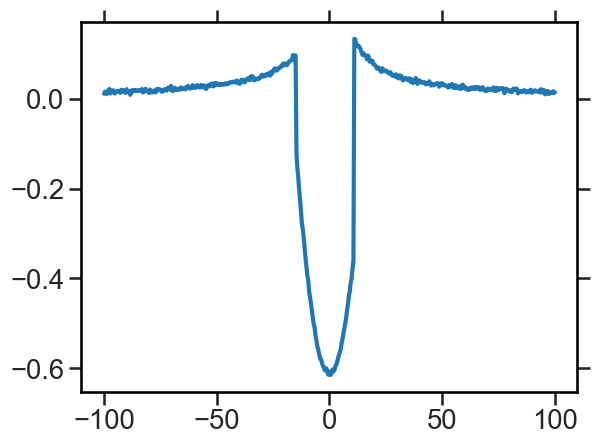

In [5]:
plt.plot(xp, yp)

### create objective function for minimization

In [6]:
def objective(theta, printout=False, cut_tails=None):
    
    if not cut_tails:
        out = initial_function(theta, Left, Right, Height)
    
    if printout:
        print('parameter = {:.4}, objective = {:.4}'.format(theta[0], out[0]))
        
    return out

### create bounds

In [7]:
left_border = -10.
right_border = 10.

bnds = Bounds(left_border, right_border)

In [10]:
initial_guess = left_border + np.abs(np.random.normal(0, 1))

args = (True, None) # additional arguments of the objective function

initial_step = 2.0 # this is not needed if parameters are normalized
maxiter = 100

option_dict = {'eps':initial_step, 'maxiter':maxiter}

vec = som(objective, x0 = left_border + initial_guess, method='SLSQP', bounds=bnds, 
    args=args, options=option_dict)

parameter = -10.0, objective = -0.381
parameter = -8.0, objective = -0.4664
parameter = -9.957, objective = -0.385
parameter = -7.957, objective = -0.463
parameter = -9.762, objective = -0.3967
parameter = -7.762, objective = -0.4729
parameter = -8.811, objective = -0.4386
parameter = -6.811, objective = -0.5051
parameter = -4.653, objective = -0.5623
parameter = -2.653, objective = -0.5975
parameter = -0.001824, objective = -0.6118
parameter = 1.998, objective = -0.6014
parameter = -1.058, objective = -0.6093
parameter = -0.3661, objective = -0.6099
parameter = -0.09361, objective = -0.6129
parameter = 1.906, objective = -0.6068
parameter = -0.2293, objective = -0.6056
parameter = -0.1072, objective = -0.6125
parameter = -0.09496, objective = -0.6136
parameter = 1.905, objective = -0.6047
parameter = -1.071, objective = -0.6067
parameter = -0.2833, objective = -0.6068
parameter = -0.1138, objective = -0.6109
parameter = -0.09685, objective = -0.6109
parameter = -0.09515, objective = -

(-10.0, 10.0)

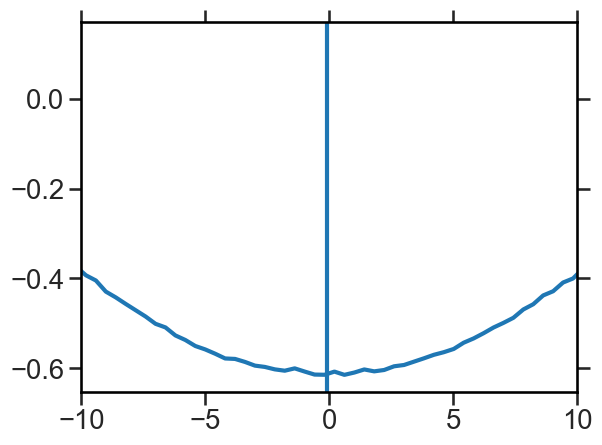

In [14]:
plt.plot(xp, yp)

plt.axvline(vec.x[0])

plt.xlim(left_border, right_border)